Using some information about person I will try to predict/estimate theri insurance cost.

<li> Currency in this data set is unknown </li>


In [56]:
import pandas as  pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation


In [57]:
def corr_plot(df,size=10):
    '''  Function for plotting correlation matrix for each pair of columns in df'''
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)),corr.columns, rotation = "vertical")
    plt.yticks(range(len(corr.columns)), corr.columns)

In [58]:
file = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"

insurance = pd.read_csv(file)

In [59]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Data summary

In [62]:
print ("Rows     : " , insurance.shape[0])
print ("Columns  : " , insurance.shape[1])
print ("\nFeatures : \n" , insurance.columns.tolist())
print ("\nMissing values :  ", insurance.isnull().sum().values.sum())
print ("\nUnique values :  \n",insurance.nunique())

Rows     :  1338
Columns  :  7

Features : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values :   0

Unique values :  
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


# Correlaction

In [63]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


No handles with labels found to put in legend.


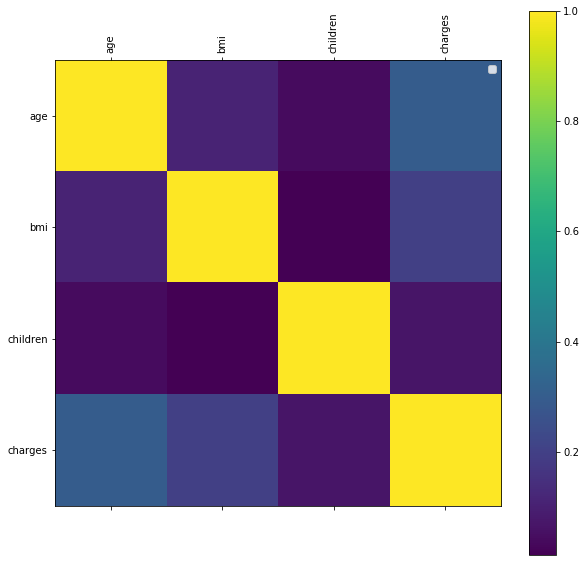

In [64]:
corr_plot(insurance)

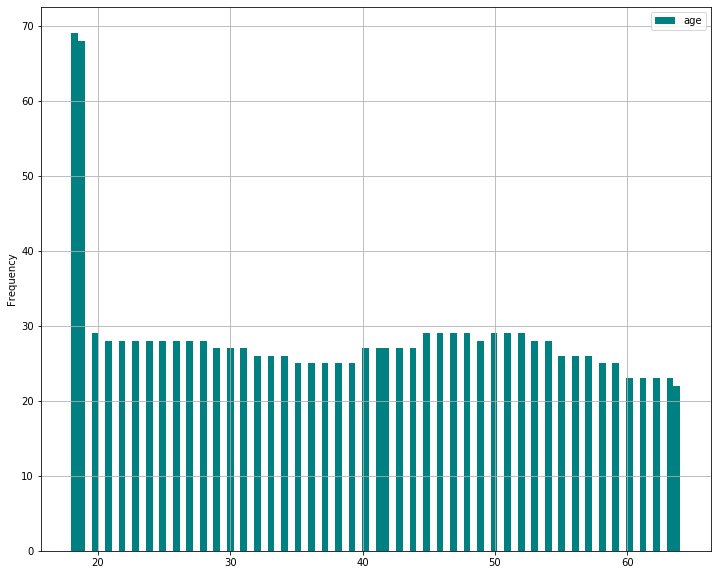

In [65]:
insurance.plot(
    kind = 'hist',
    y = 'age',
    bins = 90,
    color = "teal",
    grid = True,
    figsize=(12,10)
)
plt.show()

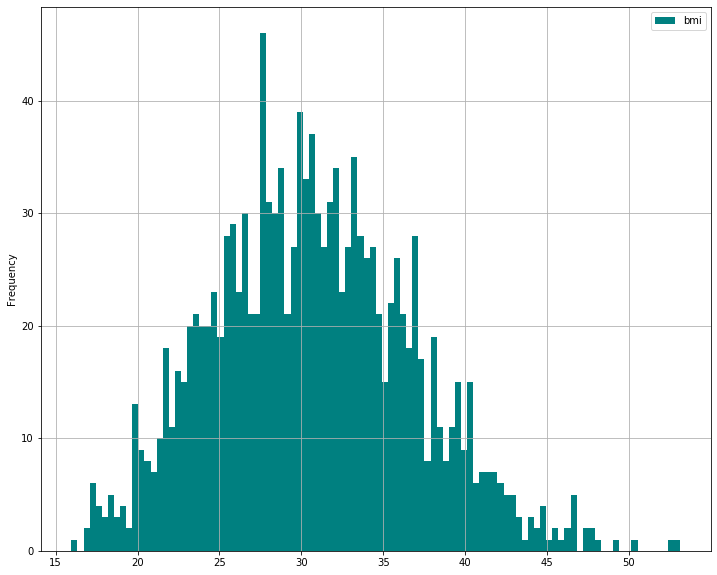

In [66]:
insurance.plot(
    kind = 'hist',
    y = 'bmi',
    bins = 100,
    color = "teal",
    grid = True,
    figsize=(12,10)
)
plt.show()

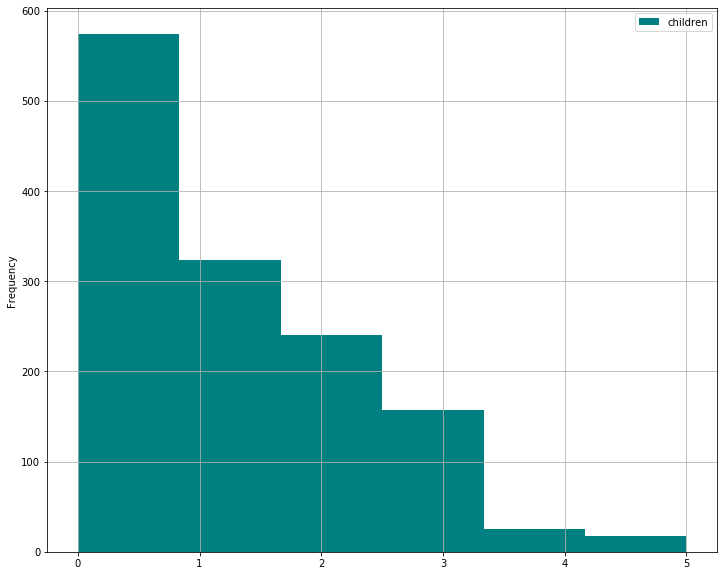

In [67]:
insurance.plot(
    kind = 'hist',
    y = 'children',
    bins = 6,
    color = "teal",
    grid = True,
    figsize=(12,10)
)
plt.show()

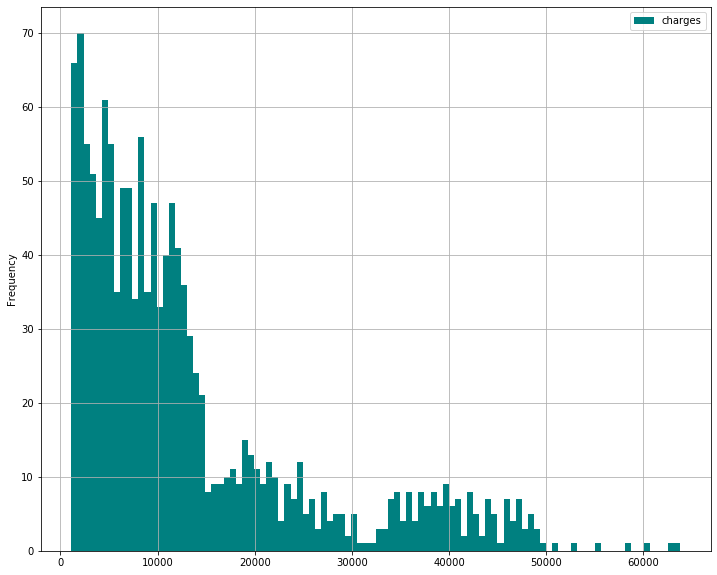

In [68]:
insurance.plot(
    kind = 'hist',
    y = 'charges',
    bins = 100,
    color = "teal",
    grid = True,
    figsize=(12,10)
)
plt.show()

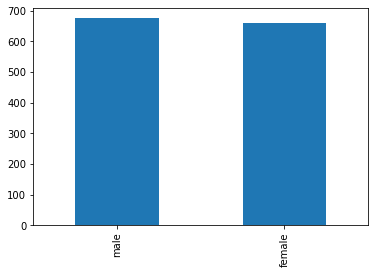

In [69]:
insurance['sex'].value_counts().plot(kind='bar')

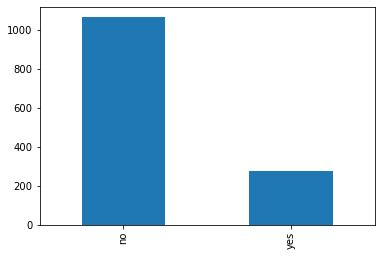

In [70]:
insurance['smoker'].value_counts().plot(kind='bar')

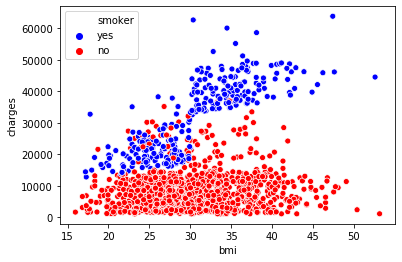

In [71]:
pal = ['blue', 'red']

sns.scatterplot(x='bmi', y='charges', data=insurance,palette=pal, hue="smoker")

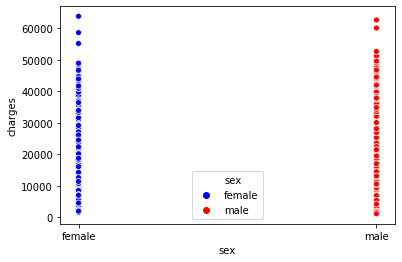

In [72]:
pal = ['blue', 'red']

sns.scatterplot(x='sex', y='charges', data=insurance,palette=pal, hue="sex")

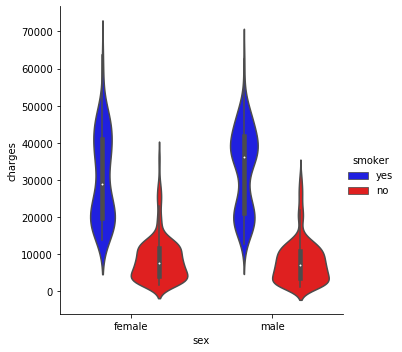

In [73]:
sns.catplot(x='sex',y='charges', hue="smoker",kind='violin', data=insurance,palette=pal)

# Data prep

In [74]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
insurance["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Region is irrelevant, I don't know origin country for this dataset

In [76]:
insurance.drop(columns="region", inplace=True)

# Changing yes/no values to binary 

In [77]:
insurance["sex"] = insurance["sex"].map(lambda s: 1 if s == 'female' else 0)

In [78]:
insurance["smoker"] = insurance["smoker"].map(lambda s: 1 if s == "yes" else 0 )

In [79]:
insurance.sample()

,age,sex,bmi,children,smoker,charges
737,26,0,23.7,2,0,3484.331


In [80]:
X = insurance.drop(['charges'], axis=1)
y = insurance.charges

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [82]:
lr = LinearRegression().fit(X_train,y_train)
y_train_pred =lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7952171980481992


In [83]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53000,11457.247488
610,8547.69130,9925.930740
569,45702.02235,37768.549419
1034,12950.07120,15853.346790
198,9644.25250,6939.119725
...,...,...
574,13224.05705,14429.077741
1174,4433.91590,6705.247131
1327,9377.90470,11152.092298
817,3597.59600,7200.555548


# Normalization

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-0.514853,0.985155,-0.181331,-0.063607,-0.503736
1,1.548746,0.985155,-1.393130,-0.892144,-0.503736
2,-1.439915,-1.015069,-0.982242,-0.063607,-0.503736
3,-1.368757,0.985155,-1.011133,-0.892144,1.985167
4,-0.941805,0.985155,-1.362635,-0.892144,-0.503736


In [86]:
pd.DataFrame(y_train).head()

,charges
1075,4562.84210
131,13616.35860
15,1837.23700
1223,26125.67477
1137,3176.28770


# Random Forest

In [87]:
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Result of Random Forest on example data set

In [88]:
my_info = {
    "age" : [30],
    "sex" : [0], #as done before in data prep
    "bmi" : [27],
    "children" : [0], 
    "smoker" : [0] #same as with sex, corrected in data prep
}
# Iam not using region here, It is irrelevant.

my_info = pd.DataFrame(my_info)

In [89]:
my_info2 = my_info.copy()

In [90]:
my_info = sc.transform(my_info)

In [91]:
my_info

array([[-0.65717067, -1.01506865, -0.5970344 , -0.89214407, -0.50373604]])

In [92]:
my_info = my_info.reshape(1,-1)
print(my_info.shape)
my_info

(1, 5)


array([[-0.65717067, -1.01506865, -0.5970344 , -0.89214407, -0.50373604]])

In [93]:
random_forest_reg.predict(my_info)

array([5047.3653336])

In [94]:
my_info2["pred_charge"] = random_forest_reg.predict(my_info)[0]

In [95]:
my_info2

,age,sex,bmi,children,smoker,pred_charge
0,30,0,27,0,0,5047.365334


# Result of Linear regressieon

In [99]:
lr.predict(my_info)

array([-24190.67969219])

Well that wasn't accurate at all